# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [1]:
import requests_cache
from lxml import html
import requests
from bs4 import BeautifulSoup

requests_cache.install_cache("cache")

def extractArticleUrls(url, page = 1):
    """
    Function that extracts all of the links to articles in an Aggie article list
    """
    page = requests.get(url+'page/'+str(page))
    soup = BeautifulSoup(page.content, 'html.parser')
    mainContent = soup.find_all("h2", class_="entry-title")
    URLS = list()
    for div in mainContent:
        links = div.findAll('a')
        for a in links:
            URLS.append(a.get("href"))
    return(URLS)
#result = extractArticleUrls('https://theaggie.org/campus/',1)

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [2]:
def extractArticleInfo(url):
    """
    Function that extracts the title, text, and author of an Aggie article.
    """
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    find_author = soup.find_all("strong")
    title = soup.find_all("h1", {"itemprop":"headline","class":"entry-title"})[0].string
    author = [val.get_text() for val in find_author if "Written" in val.get_text()]
    text = list()
    mainContent = soup.find_all("div", {"itemprop":"articleBody", "class":"clearfix"})
    for p in mainContent[0].find_all("p"):
        text.append(p.get_text())
    if len(text[-1].split('\n')) == 2:
        lastline = text[-1].split('\n')
        author1 = lastline[1]
        text[-1] = lastline[0]
    else:
        author1 = text[-1]
        text[-1] = ""        
    text = " ".join(text)
    if author == []:
        author = author1
    else:
        author = author[0]
    return({'author':author, 'text': text, 'title': title, 'url' : url})

In [3]:
page = requests.get('https://theaggie.org/2017/02/20/city-of-davis-awarded-funds-for-new-recycling-bins/')
soup = BeautifulSoup(page.content, 'html.parser')
find_author = soup.find_all("strong")
title = soup.find_all("h1", {"itemprop":"headline","class":"entry-title"})[0].string
author = [val.get_text() for val in find_author if "Written" in val.get_text()]
text = list()
mainContent = soup.find_all("div", {"itemprop":"articleBody", "class":"clearfix"})
for p in mainContent[0].find_all("p"):
        text.append(p.get_text())
lastline = text[-1].split('\n')

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [4]:
def articleLookUp(articles, location):
    result = list()
    for item in articles:
        tmp = extractArticleInfo(item)
        tmp["type"] = location
        result.append(tmp)
    return(result)

In [5]:
#Extract 60 campus news and 60 city news
news = list()
page = 1
while len(news) < 120 :
    print(len(news))
    if len(news) < 60:
        articles = extractArticleUrls('https://theaggie.org/campus/', page)
        info = articleLookUp(articles, "Campus")
        news += info
    else:
        articles = extractArticleUrls('https://theaggie.org/city/', page)
        info =  articleLookUp(articles, "City")
        news += info
    page += 1

0
15
30
45
60
75
90
105


No handlers could be found for logger "bs4.dammit"


In [6]:
import pandas as pd
aggieData = pd.DataFrame(news)
aggieData

,author,text,title,type,url
0,Written by: Aaron Liss — campus@theaggie.org,Students receive email warnings from UC Davis ...,UC Davis experiences several recent hate-based...,Campus,https://theaggie.org/2017/02/21/uc-davis-exper...
1,Written by: Alyssa Vandenberg — campus@theagg...,UC Board of Regents to vote on the appointment...,UC President selects Gary May as new UC Davis ...,Campus,https://theaggie.org/2017/02/21/uc-president-s...
2,Written by: Jeanna Totah — campus@theaggie.org,Tighter policies require greater approval of o...,Katehi controversy prompts decline of UC admin...,Campus,https://theaggie.org/2017/02/20/katehi-controv...
3,Written by: Ivan Valenzuela — campus@theaggie...,SR #7 asks university to increase capacity for...,ASUCD Senate passes resolution submitting comm...,Campus,https://theaggie.org/2017/02/20/asucd-senate-p...
4,Written by: Yvonne Leong — campus@theaggie.org,UC Davis leads in sustainability with largest ...,UC releases 2016 Annual Report on Sustainable ...,Campus,https://theaggie.org/2017/02/20/uc-releases-20...
5,Written by: Kenton Goldsby — campus@theaggie.org,"Speakers, including Interim Chancellor Ralph J...",UC Davis Global Affairs holds discussion on Pr...,Campus,https://theaggie.org/2017/02/19/uc-davis-globa...
6,Written by: Kimia Akbari — campus@theaggie.org,Executive order has immediate consequences for...,Trump’s immigration ban affects UC Davis commu...,Campus,https://theaggie.org/2017/02/19/trumps-immigra...
7,Written by: Kaitlyn Cheung — campus@theaggie.org,Student protesters march from MU flagpole to M...,UC Davis students participate in UC-wide #NoDA...,Campus,https://theaggie.org/2017/02/17/uc-davis-stude...
8,Written by: Jayashri Padmanabhan — campus@thea...,"Conference entails full day of speakers, panel...",UC Davis holds first mental health conference,Campus,https://theaggie.org/2017/02/17/uc-davis-holds...
9,Written by: Demi Caceres — campus@theaggie.org,Last week in Senate The ASUCD Senate meeting w...,Last week in Senate,Campus,https://theaggie.org/2017/02/16/last-week-in-s...


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [26]:
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [27]:
stemmer = PorterStemmer().stem
tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

In [41]:
from collections import Counter
sample = aggieData['text']
result = list()
def grab_words(text): 
    text = text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    lowercase_sample = text.lower()
    tokens = tokenize(lowercase_sample)
    tags = nltk.pos_tag(tokens)
    return([item for item in tags if item[1] == 'NN'])
#finder = BigramCollocationFinder.from_words(grab_words(sample))
#finder.nbest(trigram_measures.pmi, 50)
for article in sample:
    result = result +  grab_words(article)

In [42]:
result

[(u'davis', 'NN'),
 (u'police', 'NN'),
 (u'davis', 'NN'),
 (u'community', 'NN'),
 (u'crime', 'NN'),
 (u'davis', 'NN'),
 (u'police', 'NN'),
 (u'department', 'NN'),
 (u'incident', 'NN'),
 (u'campus', 'NN'),
 (u'incident', 'NN'),
 (u'jan.', 'NN'),
 (u'inside', 'NN'),
 (u'union', 'NN'),
 (u'bathroom', 'NN'),
 (u'stall', 'NN'),
 (u'ink', 'NN'),
 (u'length', 'NN'),
 (u'school', 'NN'),
 (u'police', 'NN'),
 (u'scene', 'NN'),
 (u'week', 'NN'),
 (u'piece', 'NN'),
 (u'pork', 'NN'),
 (u'tenderloin', 'NN'),
 (u'doorstep', 'NN'),
 (u'russell', 'NN'),
 (u'park', 'NN'),
 (u'max', 'NN'),
 (u'thomas', 'NN'),
 (u'ucdpd', 'NN'),
 (u'russell', 'NN'),
 (u'park', 'NN'),
 (u'incident', 'NN'),
 (u'residence', 'NN'),
 (u'while', 'NN'),
 (u'piece', 'NN'),
 (u'meat', 'NN'),
 (u'front', 'NN'),
 (u'doorway', 'NN'),
 (u'thomas', 'NN'),
 (u'concern', 'NN'),
 (u'incident', 'NN'),
 (u'mosque', 'NN'),
 (u'russell', 'NN'),
 (u'boulevard', 'NN'),
 (u'animal', 'NN'),
 (u'trash', 'NN'),
 (u'bag', 'NN'),
 (u'tore', 'NN'),
 (

Question 1: What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

In [28]:
articleDF = aggieData['text']
campusDF = aggieData.loc[aggieData['type'] == 'Campus', 'text']
cityDF = aggieData.loc[aggieData['type'] == 'City', 'text']
articleCorpus = [article for article in articleDF]
campusCorpus = [article for article in campusDF]
cityCorpus = [article for article in cityDF]

In [29]:
def runIDF(corpus):
    textd = {} #dictionary from lemmata to document ids containing that lemma
    for article in corpus:
        s = set(lemmatize(article))
        try:
            toks = toks | s
        except NameError:
            toks = s
        for tok in s:
            try:
                textd[tok].append(article)
            except KeyError:
                textd[tok] = [article]
    docids = {} #dictionary of the document id to an integer id for the document
    N = len(corpus)
    for i in xrange(N):
        docids[corpus[i]] = i

    tokids = {} #dictionary of lemma to integer id for the lemma
    tok_list = list(toks)
    m = len(tok_list)
    for j in xrange(m):
        tokids[tok_list[j]] = j
    numd = {key:len(set(val)) for key,val in textd.items()}
    logN = np.log(len(articleCorpus))
    idf_smooth = {key:logN - np.log(1 + val) for key, val in numd.items() if val > 1}
    return(idf_smooth)

In [14]:
tags = nltk.pos_tag(idf_smooth)
keys = [item[0] for item in tags if item[1] == 'NN']
tmp = list()
for key in keys:
    tmp.append([key, idf_smooth[key]])
nounDF = pd.DataFrame(tmp, columns= ["Lemmata", "Value"])
sortedDf = nounDF.sort(['Value'],  ascending=[1])
sortedDf.head(30)

/home/kavi/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Lemmata,Value
256,davi,0.133531
289,thi,0.143101
229,wa,0.172371
1344,ha,0.310155
1431,student,0.418044
1229,commun,0.470004
540,year,0.510826
68,work,0.553385
1140,includ,0.582799
460,peopl,0.597837


In [ ]:
runIDF(campusCorpus)

(array([  24.,   14.,   14.,   20.,   18.,   48.,   47.,   51.,   61.,
          59.,  128.,  110.,  147.,   74.,  183.,  153.,  195.,  264.,
         422.,  876.]),
 array([-0.0082988 ,  0.17656011,  0.36141902,  0.54627794,  0.73113685,
         0.91599576,  1.10085467,  1.28571359,  1.4705725 ,  1.65543141,
         1.84029033,  2.02514924,  2.21000815,  2.39486706,  2.57972598,
         2.76458489,  2.9494438 ,  3.13430272,  3.31916163,  3.50402054,
         3.68887945]),
 <a list of 20 Patch objects>)

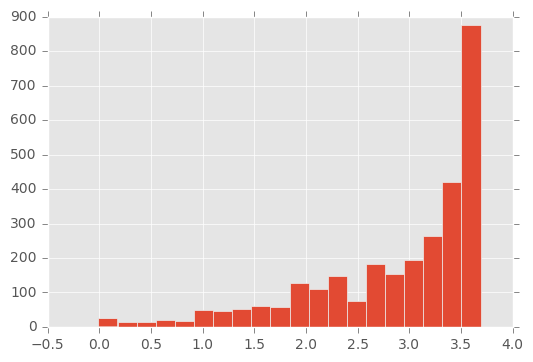

In [15]:
plt.hist(idf_smooth.values(),bins=20)

In [39]:
# create a function which returns the value of a dictionary
def keyfunction(k):
    return idf_smooth[k]

# sort by dictionary by the values and print top 3 {key, value} pairs
for key in sorted(idf_smooth, key=keyfunction)[:200]:
    print "%s: %i" % (key, idf_smooth[key])

,: 0
and: 0
the: 0
to: 0
a: 0
.: 0
in: 0
of: 0
is: 0
for: 0
that: 0
”: 0
on: 0
with: 0
said: 0
as: 0
be: 0
it: 0
at: 0
davi: 0
thi: 0
an: 0
from: 0
wa: 0
are: 0
have: 0
by: 0
not: 0
we: 0
also: 0
who: 0
will: 0
]: 0
[: 0
ha: 0
uc: 0
their: 0
or: 0
all: 0
about: 0
student: 0
can: 0
they: 0
commun: 0
more: 0
one: 0
which: 0
year: 0
(: 0
): 0
other: 0
our: 0
work: 0
there: 0
so: 0
but: 0
includ: 0
peopl: 0
do: 0
been: 0
i: 0
becaus: 0
new: 0
make: 0
help: 0
were: 0
campu: 0
up: 0
“i: 0
“we: 0
time: 0
like: 0
plan: 0
mani: 0
“the: 0
out: 0
major: 0
get: 0
some: 0
go: 0
accord: 0
event: 0
support: 0
california: 0
first: 0
come: 0
need: 0
state: 0
well: 0
he: 0
just: 0
take: 0
over: 0
public: 0
educ: 0
univers: 0
if: 0
continu: 0
veri: 0
think: 0
use: 0
may: 0
would: 0
want: 0
it’: 0
realli: 0
into: 0
presid: 0
member: 0
after: 0
these: 0
while: 0
provid: 1
what: 1
import: 1
last: 1
…: 1
sinc: 1
how: 1
way: 1
where: 1
when: 1
had: 1
citi: 1
onli: 1
lot: 1
creat: 1
local: 1
program: 1
them: 1

Question 2: What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
tfs = vectorizer.fit_transform(articleCorpus)
sim = tfs.dot(tfs.T)


Question 3: 
Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.